# Predicting Fuel Consumption with Linear Regression

In [103]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


# Data Pre-Processing

In [104]:
data = pd.read_csv(r"C:\PYTHON\machineLearning-with-sklearn\regression\FuelConsumption.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [106]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [107]:
corr_ = data.corr()
corr_

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


# Visual Inspection

<AxesSubplot:>

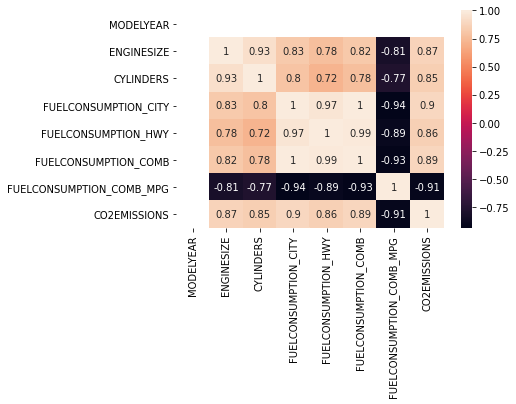

In [108]:
sns.heatmap(corr_, annot=True)

In [109]:
data.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [110]:
dataFrame = data[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
corr_ = dataFrame.corr()

<AxesSubplot:>

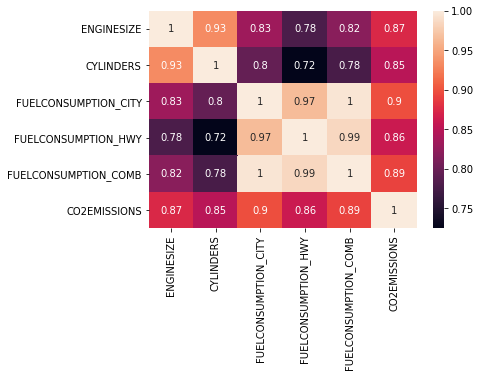

In [111]:
sns.heatmap(corr_, annot=True)

# Training Model

In [112]:
from sklearn.model_selection import train_test_split
X = dataFrame[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']]
Y = data[['CO2EMISSIONS']]
x_train, x_test, y_train, y_test = train_test_split(X, Y , test_size=0.2, random_state=0)

In [113]:
x_train.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
270,3.6,6,14.6,10.2,12.6
1006,4.6,8,16.9,12.8,15.1
728,3.5,6,12.1,8.7,10.6
992,2.5,4,10.6,8.2,9.5
702,1.5,4,8.0,6.7,7.4


In [114]:
y_train.head()

,CO2EMISSIONS
270,290
1006,347
728,244
992,218
702,170


In [115]:
x_train, x_test, y_train, y_test = x_train.values, x_test.values, y_train.values, y_test.values

In [116]:
from sklearn.linear_model import LinearRegression

In [117]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [118]:
regressor.coef_

array([[11.97246308,  7.61737204, -8.82369814, -6.8908748 , 24.74692662]])

In [119]:
regressor.intercept_

array([68.78768352])

In [120]:
ypred =regressor.predict(x_test)
ypred[:11]

array([[334.35815159],
       [210.23589881],
       [217.67592964],
       [229.08324737],
       [195.45223268],
       [296.80542033],
       [210.4500467 ],
       [264.95577211],
       [207.5261927 ],
       [319.944612  ],
       [279.62601896]])

In [121]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [122]:
print("Mean Absolute Error : {}".format(mean_absolute_error(y_test, ypred)))
print("Mean Squared Error : {}".format(mean_squared_error(y_test, ypred)))
print("R2 Score : {}".format(r2_score(y_test, ypred)))

Mean Absolute Error : 18.02420746236802
Mean Squared Error : 590.6576869083515
R2 Score : 0.8600829755697951


# KFold Cross Validation

In [123]:
from sklearn.model_selection import KFold
MAE = []
MSE = []
R2 = []
folds = KFold(n_splits=5)
for train_index, test_index in folds.split(X):
    nx_train, nx_test, ny_train, ny_test = X.iloc[train_index].values, X.iloc[test_index].values, Y.iloc[train_index].values, Y.iloc[test_index]

    reg = LinearRegression()
    reg.fit(nx_train, ny_train)
    ny_pred = reg.predict(nx_test)

    mae = mean_absolute_error(ny_test, ny_pred)
    mse = mean_squared_error(ny_test, ny_pred)
    r2 =  r2_score(ny_test, ny_pred)
    MAE.append(mean_absolute_error(ny_test, ny_pred))
    MSE.append(mean_squared_error(ny_test, ny_pred))
    R2.append(r2_score(ny_test, ny_pred))
    print("Mean Absolute Error : {}".format(mae))
    print("Mean Squared Error : {}".format(mse))
    print("R2 Score : {}".format(r2))


Mean Absolute Error : 14.67844305483594
Mean Squared Error : 411.72317124049385
R2 Score : 0.8799227586912072
Mean Absolute Error : 24.202590092729633
Mean Squared Error : 1130.005739864513
R2 Score : 0.768467082900783
Mean Absolute Error : 19.220895259516123
Mean Squared Error : 713.0419941401213
R2 Score : 0.8197009345769746
Mean Absolute Error : 15.986737418755595
Mean Squared Error : 436.0447246210347
R2 Score : 0.8850861263525864
Mean Absolute Error : 14.207902380817568
Mean Squared Error : 363.6709221556601
R2 Score : 0.8960447023702001


In [124]:
print("Mean Absolute Error : {}".format(np.mean(MAE)))
print("Mean Squared Error : {}".format(np.mean(MSE)))
print("R2 Score : {}".format(np.mean(R2)))

Mean Absolute Error : 17.659313641330975
Mean Squared Error : 610.8973104043646
R2 Score : 0.8498443209783503
